In [270]:
# import necessary libraries
import jplephem
import numpy as np 
import matplotlib.pyplot as plt

In [271]:
"""
jpl ephemeris data can be extracted via the terminal with the following commands

python -m jplephem comment de421.bsp
python -m jplephem daf de421.bsp
python -m jplephem spk de421.bsp
"""

'\njpl ephemeris data can be extracted via the terminal with the following commands\n\npython -m jplephem comment de421.bsp\npython -m jplephem daf de421.bsp\npython -m jplephem spk de421.bsp\n'

In [272]:
# kernel details the segments available in the .bsp file

from jplephem.spk import SPK
kernel = SPK.open('de421.bsp')
print(kernel)


File type DAF/SPK and format LTL-IEEE with 15 segments:
2414864.50..2471184.50  Type 2  Solar System Barycenter (0) -> Mercury Barycenter (1)
2414864.50..2471184.50  Type 2  Solar System Barycenter (0) -> Venus Barycenter (2)
2414864.50..2471184.50  Type 2  Solar System Barycenter (0) -> Earth Barycenter (3)
2414864.50..2471184.50  Type 2  Solar System Barycenter (0) -> Mars Barycenter (4)
2414864.50..2471184.50  Type 2  Solar System Barycenter (0) -> Jupiter Barycenter (5)
2414864.50..2471184.50  Type 2  Solar System Barycenter (0) -> Saturn Barycenter (6)
2414864.50..2471184.50  Type 2  Solar System Barycenter (0) -> Uranus Barycenter (7)
2414864.50..2471184.50  Type 2  Solar System Barycenter (0) -> Neptune Barycenter (8)
2414864.50..2471184.50  Type 2  Solar System Barycenter (0) -> Pluto Barycenter (9)
2414864.50..2471184.50  Type 2  Solar System Barycenter (0) -> Sun (10)
2414864.50..2471184.50  Type 2  Earth Barycenter (3) -> Moon (301)
2414864.50..2471184.50  Type 2  Earth Bary

In [273]:
# using the .bsp file, it is possible to determine the position of a planet wrt to a certain reference point
# for example we consider saturn on feb 8 2015 wrt to solar system barycenter
# very confused about the date convention system 
# date stored in terms of UTC seconds (from 1980)

# set the vector output rounding
np.set_printoptions(precision=3)

# position and velocity of the planet can be determined
position, velocity = kernel[0,6].compute_and_differentiate(2457061.5)
print("position of saturn is ")
print(position)
print("the velocity as this point is ")
print(velocity)

# note that velocity is given in distance travelled by day (can be converted to other units)
# distance is given in kilometers

position of saturn is 
[-7.836e+08 -1.183e+09 -4.549e+08]
the velocity as this point is 
[ 664075.449 -397634.555 -192833.867]


In [274]:

def position_array(planets, type):

    if type == "3d":
        positions_array = ([], [], [])

    if type == "2d":
        positions_array = ([], [])    
    for i in planets:
        if type == "3d":
            positions_array[0].append(i[0])
            positions_array[1].append(i[1])
            positions_array[2].append(i[2])
        if type == "2d":
            positions_array[0].append(i[0])
            positions_array[1].append(i[1])

    return positions_array




In [275]:
# extract sun and earth position on Jan 18th 2000 and plot on a 2D map
# write function of gravitational potential and plot a plt.imshow of the grav potential everywhere within the range of the orbit, caused 
# the combination of gravitational potential from both the sun and the earth

import astropy
from astropy.time import Time
from astropy import units as u

# time package allows you to convert normal date and time to julian date
t = Time("2000-9-18 11:00")
t_jd = t.jd # converts to julian date

# find position of earth and sun at this time and converting to AU
sun_position = kernel[0,10].compute(t.jd) 
earth_position = kernel[0,3].compute(t.jd) 

# append to positions array
positions = position_array((sun_position, earth_position), "3d")
print(positions)





print(sun_position, earth_position)

([-815021.8348675325, 149083010.92842126], [-620405.6735999944, -10652559.59355427], [-240835.83496213015, -4590402.853304417])
[-815021.835 -620405.674 -240835.835] [ 1.491e+08 -1.065e+07 -4.590e+06]


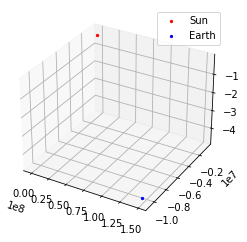

In [276]:
# plot 3d position 

from mpl_toolkits.mplot3d import Axes3D


fig = plt.figure()
ax = fig.add_subplot(projection = '3d')
ax.scatter(positions[0][0], positions[1][0], positions[2][0], c = 'red', marker = ".", label = "Sun")
ax.scatter(positions[0][1], positions[1][1], positions[2][1], c = 'blue', marker = ".", label = "Earth")
plt.legend()
plt.show()

In [277]:
# now plot on a 2d axes (remove z dimension) and plot grav potential as an imshow graph

import scipy
from scipy import constants

# defining a function to calculate the gravitational potential

mass_sun = 1.989e30
mass_earth = 5.972e24
mass_array = []
mass_array.append(mass_sun)
mass_array.append(mass_earth)

def grav_potential(r, mass):

    # this function calculates the gravitational potential at a point due to contribution of an array of masses

    
    potential = -(constants.G * mass)/r

    return potential
        

([-815021.8348675325, 149083010.92842126], [-620405.6735999944, -10652559.59355427])


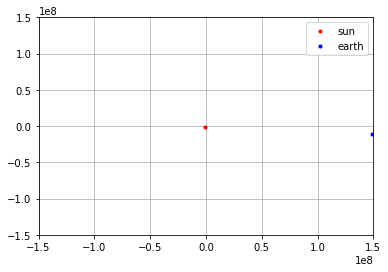

In [278]:

# now we only want the 2d positions array

two_positions = position_array((sun_position, earth_position),"2d")
print(two_positions)

plt.figure("2d plot of earth and sun")
plt.plot(two_positions[0][0], two_positions[1][0], ".", c = "red", label = "sun")
plt.plot(two_positions[0][1], two_positions[1][1], ".", c = "blue", label = "earth")
plt.legend()
plt.xlim([-1.5e8, 1.5e8])
plt.ylim([-1.5e8, 1.5e8])

plt.grid()
plt.show()

# we want to find the gravitational potential in a 2d array for the orbit of the earth around the sun
# the radius of orbit of the earth is approximately 1.5x10^8 km approximating the orbit as circular
# so take a square area of length 3x10^8 with increments at every 6x10^6 km to get 50x50 inputs




In [279]:
# we want to find the gravitational potential in a 2d array for the orbit of the earth around the sun
# the radius of orbit of the earth is approximately 1.5x10^8 km approximating the orbit as circular
# so take a square area of length 3x10^8 with increments at every 6x10^6 km to get 50x50 inputs
# note that the sun is essentially at the center already


# creating the 2d array
x_coord = np.linspace(-2.5e8, 2.5e8, 1000)
y_coord = np.linspace(-2.5e8, 2.5e8, 1000)

X,Y = np.meshgrid(x_coord, y_coord)

def potential_array(X,Y, mass_array, two_positions, type):
    # the "type" distinguishes whether data is being used for plotting graph or for searching numerical values

    # function will iterate through each coordinate point and calculate the grav potential at that point
    potential = np.zeros((len(X),len(Y)))

    
    
    for i in range(len(X)):
        for j in range(len(Y)):
            # looping through the x and y coordinates in the mesh grid
            for x in range(len(mass_array)):
                # loops through the number of masses to consider and finds the radial distance of the mass to the point on the mesgrid
                x_diff = abs(X[i][j] - two_positions[0][x])
                y_diff = abs(Y[i][j] - two_positions[1][x])
                
                r = np.sqrt(x_diff**2 + y_diff**2)

                potential[i][j] += grav_potential(r, mass_array[x])

            # Cap values as it will mess up contour plot height calculation functionality
            if type == "graph":
                if potential[i][j] < -8000000000000:
                    potential[i][j] = -8000000000000
            if type == "numerical":
                continue
        

    return potential

                
graph_potential_values = potential_array(X,Y, mass_array, two_positions, "graph")
potential_values = potential_array(X,Y, mass_array, two_positions, "numerical")

print(potential_values)
print(len(potential_values))



#logscale_potential = np.log(abs(potential_values))
#print(potential_values)

# 10 data points
# -622753761314.2579
# -5890232201142.565

# 100 data points 
# -622753761314.2579
# -111103565557535.06



[[-3.766e+11 -3.769e+11 -3.773e+11 ... -3.761e+11 -3.757e+11 -3.753e+11]
 [-3.769e+11 -3.773e+11 -3.777e+11 ... -3.765e+11 -3.761e+11 -3.757e+11]
 [-3.773e+11 -3.777e+11 -3.781e+11 ... -3.768e+11 -3.765e+11 -3.761e+11]
 ...
 [-3.764e+11 -3.768e+11 -3.771e+11 ... -3.759e+11 -3.755e+11 -3.752e+11]
 [-3.760e+11 -3.764e+11 -3.768e+11 ... -3.755e+11 -3.752e+11 -3.748e+11]
 [-3.756e+11 -3.760e+11 -3.764e+11 ... -3.752e+11 -3.748e+11 -3.744e+11]]
1000


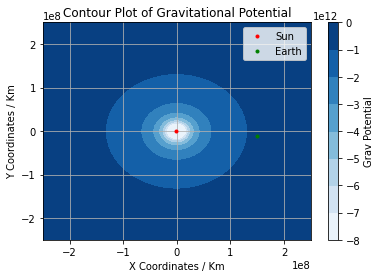

In [280]:
# now we want to plot the potential values as an imshow graph

plt.figure("gravitational potential figure")
plt.contourf(X,Y, graph_potential_values, cmap = "Blues")
plt.plot(two_positions[0][0], two_positions[1][0], ".", c = "red", label = "Sun")
plt.plot(two_positions[0][1], two_positions[1][1], ".", c = "green", label = "Earth")
plt.xlabel('X Coordinates / Km')
plt.ylabel('Y Coordinates / Km')
plt.title("Contour Plot of Gravitational Potential")
cbar = plt.colorbar()
cbar.ax.set_ylabel('Grav Potential')
#plt.xlim([-1.5e8, 1.5e8])
#plt.ylim([-1.5e8, 1.5e8])
plt.grid()
plt.legend()
plt.show()

In [289]:
# now we want to search for the lagrange points in the array, these should occur when the grad of the potential = 0

# np.gradient returns grad in x then y direction
grad_potential = np.gradient(potential_values,500e3,500e3)
x_grad = grad_potential[0]
y_grad = grad_potential[1]

def lagrange_point(potential_values):
    # this function should find the lagrange point in the 2d arrays
    # first search rows for min point then search corresponding collumn for max point, if the positions are the same then
    # save as lagrange point

    lagrange_points = []

    for i in range(len(potential_values)):
        # searching for minimums and corresponding maximums
        # the function loops through the rows and finds the minimum in each row
        position_min = np.where(potential_values[i] == np.amin(potential_values[i]))
        
        # now we want to search the collumn corresponding to the minimum and see if the position of the maximum corresponds with the minimum
        collumn = []
        for j in range(len(potential_values)):
            collumn.append(potential_values[j][position_min[0][0]])
        
        # finding the position of the max value in the collumn
        position_max = np.where(collumn == np.amax(collumn))

        if i == position_max[0][0]:
            lagrange_points.append([i,position_min[0][0]])
            
            

        
        # now searching for maxmimums and corresponding minimums
        position_max1 = np.where(potential_values[i] == np.amax(potential_values[i]))

        # again create the collumn that corresponds to this maximum
        collumn_1 = []
        for j in range(len(potential_values)):
            collumn_1.append(potential_values[j][position_max1[0][0]])
        

        position_min1 = np.where(collumn_1 == np.amax(collumn_1))

        if i == position_min1[0][0]:
            lagrange_points.append([i, position_max1[0][0]])

    return lagrange_points

Lpoints_x = lagrange_point(x_grad)
Lpoints_y = lagrange_point(y_grad)
print(Lpoints_x)
print(Lpoints_y)

L1_x = X[Lpoints_x[0][0]][Lpoints_x[0][1]]
L1_y = Y[Lpoints_x[0][0]][Lpoints_x[0][1]]

L2_x = X[Lpoints_x[1][0]][Lpoints_x[1][1]]
L2_y = Y[Lpoints_x[0][0]][Lpoints_x[0][1]]

L3_x = X[Lpoints_y[0][0]][Lpoints_y[0][1]]
L3_y = Y[Lpoints_y[0][0]][Lpoints_x[0][1]]

L4_x = X[Lpoints_y[1][0]][Lpoints_y[1][1]]
L4_y = Y[Lpoints_y[0][0]][Lpoints_y[0][1]]

print(x_grad)
        
    



[[499, 498], [853, 999]]
[[498, 499], [999, 144]]
[[-756.72  -759.004 -761.295 ... -753.864 -751.596 -749.334]
 [-757.099 -759.387 -761.681 ... -754.239 -751.967 -749.702]
 [-757.857 -760.151 -762.452 ... -754.988 -752.709 -750.438]
 ...
 [ 755.975  758.252  760.536 ...  753.127  750.865  748.61 ]
 [ 755.212  757.482  759.759 ...  752.372  750.117  747.869]
 [ 754.83   757.097  759.37  ...  751.994  749.743  747.498]]


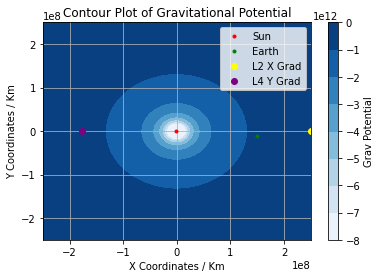

In [291]:
plt.figure("gravitational potential with lagrange points")
plt.contourf(X,Y, graph_potential_values, cmap = "Blues")
plt.plot(two_positions[0][0], two_positions[1][0], ".", c = "red", label = "Sun")
plt.plot(two_positions[0][1], two_positions[1][1], ".", c = "green", label = "Earth")
#plt.plot(L1_x, L1_y, "o", c = "white", label = "L1 X Grad")
plt.plot(L2_x, L2_y, "o", c= "yellow", label = "L2 X Grad")
#plt.plot(L3_x, L3_y, "o", c= "orange", label = "L3 Y Grad")
plt.plot(L4_x, L4_y, "o", c= "purple", label = "L4 Y Grad")
plt.xlabel('X Coordinates / Km')
plt.ylabel('Y Coordinates / Km')
plt.title("Contour Plot of Gravitational Potential")
cbar = plt.colorbar()
cbar.ax.set_ylabel('Grav Potential')
#plt.xlim([-1.5e8, 1.5e8])
#plt.ylim([-1.5e8, 1.5e8])
plt.grid()
plt.legend()
plt.show()

looks like this method only finds the L2 and L3 lagrange point
maybe have to take grad in spherical polar coordinates instead?
L2 and L3 are unstable lagrange points

calculate curvature matrix instead


In [283]:
# trying to use spiceypy to open the ephemeris lagrange point data

import spiceypy as spice

print(spiceypy.tkvrsn('TOOLKIT'))

help(spice.furnsh)


# loads the lagrange kernel in
lagrange_kernel = spice.furnsh('L1_de431.bsp')
print(lagrange_kernel)

CSPICE_N0066
Help on function furnsh in module spiceypy.spiceypy:

furnsh(path: Union[str, Iterable[str]]) -> None
    Load one or more SPICE kernels into a program.
    
    https://naif.jpl.nasa.gov/pub/naif/toolkit_docs/C/cspice/furnsh_c.html
    
    :param path: one or more paths to kernels

None


In [287]:
# improving on existing lagrange point function

def lagrange_point_new(x_grad, y_grad):
    # the x grad matrix contains the x component of the gradient vector at that point, and similarly with the y grad matrix

    # create the 2d array that will store the abs vector values
    abs_grad = np.zeros((len(x_grad),len(x_grad[0])))

    for i in range(len(x_grad)):
        # iterating through the rows of the gradient matrices
        for j in range(len(x_grad[0])):
            # iterating through the collumns of the gradient matrices
            x_comp = x_grad[i][j]
            y_comp = y_grad[i][j]

            grad_abs_value = np.sqrt(x_comp**2 + y_comp**2)

            abs_grad[i][j] = grad_abs_value

    # creating an array to store the 5 lowest values in the argmin matrix
    low_grad_vals = np.full(50,fill_value=np.inf)
    low_grad_vals_pos = np.zeros((50,2), dtype='int')
    
    # now searching array for the lowest values
    for i in range(len(abs_grad)):
        # excluding the edges of the grid
        if (i >= 100) and (i <= 900):
            # iterating through abs gradient matrix rows
            for j in range(len(abs_grad[0])):
                # iterating through abs gradient matrix collumns
                if (j>=100) and (j<=900):
                    # again excluding the edge cases
                    max_grad = np.amax(low_grad_vals)
                    max_grad_position = np.argmax(low_grad_vals)

                    # compare the max value in low grad values to the component in the abs grad 2d array
                    if abs_grad[i][j] < max_grad:

                        low_grad_vals[max_grad_position] = abs_grad[i][j]
                        low_grad_vals_pos[max_grad_position][0] = i
                        low_grad_vals_pos[max_grad_position][1] = j

                    
                    else:
                        continue
                else:
                    continue

        else:
            continue


    
    print(abs_grad)
    return (low_grad_vals,low_grad_vals_pos, abs_grad)


lagrange_points, lagrange_points_pos, abs_grad = lagrange_point_new(x_grad,y_grad)

#print(lagrange_points)
print(lagrange_points_pos) # array containing len 2 arrays with the x,y positions of the lagrange points
#print(abs_grad)


L1_x = X[lagrange_points_pos[0][0]][lagrange_points_pos[0][1]]
L1_y = Y[lagrange_points_pos[0][0]][lagrange_points_pos[0][1]]

L2_x = X[lagrange_points_pos[1][0]][lagrange_points_pos[1][1]]
L2_y = Y[lagrange_points_pos[1][0]][lagrange_points_pos[1][1]]

L3_x = X[lagrange_points_pos[7][0]][lagrange_points_pos[7][1]]
L3_y = Y[lagrange_points_pos[7][0]][lagrange_points_pos[7][1]]








    

[[1069.746 1071.629 1073.784 ... 1066.785 1064.644 1062.778]
 [1071.629 1073.515 1075.676 ... 1068.658 1066.511 1064.642]
 [1073.786 1075.678 1077.848 ... 1070.801 1068.646 1066.771]
 ...
 [1068.447 1070.324 1072.473 ... 1065.495 1063.361 1061.501]
 [1066.301 1068.172 1070.312 ... 1063.362 1061.237 1059.382]
 [1064.431 1066.299 1068.433 ... 1061.503 1059.383 1057.531]]
[[900 100]
 [899 896]
 [900 899]
 [897 900]
 [900 896]
 [896 900]
 [894 900]
 [102 899]
 [897 899]
 [898 897]
 [898 100]
 [101 898]
 [893 900]
 [899 895]
 [101 899]
 [895 898]
 [899 899]
 [900 102]
 [900 893]
 [900 898]
 [898 900]
 [899 900]
 [900 897]
 [100 899]
 [100 897]
 [898 896]
 [897 897]
 [900 894]
 [899 897]
 [894 899]
 [101 900]
 [898 899]
 [896 899]
 [895 900]
 [897 898]
 [900 895]
 [100 900]
 [900 101]
 [895 899]
 [900 900]
 [898 895]
 [899 898]
 [899 101]
 [100 898]
 [898 898]
 [102 900]
 [899 100]
 [103 900]
 [896 898]
 [899 894]]


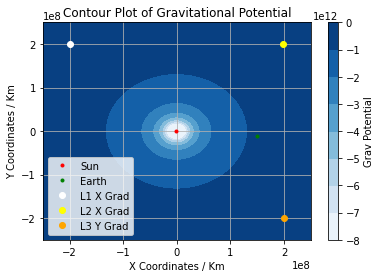

In [288]:
plt.figure("gravitational potential with lagrange points")
plt.contourf(X,Y, graph_potential_values, cmap = "Blues")
plt.plot(two_positions[0][0], two_positions[1][0], ".", c = "red", label = "Sun")
plt.plot(two_positions[0][1], two_positions[1][1], ".", c = "green", label = "Earth")
plt.plot(L1_x, L1_y, "o", c = "white", label = "L1 X Grad")
plt.plot(L2_x, L2_y, "o", c= "yellow", label = "L2 X Grad")
plt.plot(L3_x, L3_y, "o", c= "orange", label = "L3 Y Grad")
#plt.plot(L4_x, L4_y, "o", c= "purple", label = "L4 Y Grad")
plt.xlabel('X Coordinates / Km')
plt.ylabel('Y Coordinates / Km')
plt.title("Contour Plot of Gravitational Potential")
cbar = plt.colorbar()
cbar.ax.set_ylabel('Grav Potential')
#plt.xlim([-1.5e8, 1.5e8])
#plt.ylim([-1.5e8, 1.5e8])
plt.grid()
plt.legend()
plt.show()

In [296]:
# creating a function that generates the curvature matrix at each point

from numpy import linalg 

def curvature_matrix(x_grad, y_grad, lagrange_points_pos):
    # finds the hessian matrix at each of the lagrange points and finds the corresponding eigenvalues of that matrix
    xx, xy = np.gradient(x_grad)
    yx, yy = np.gradient(y_grad)
    
    for i in lagrange_points_pos:
        curv_matrix = np.zeros((2,2))
        curv_matrix[0][0] = xx[i[0]][i[1]]
        curv_matrix[0][1] = xy[i[0]][i[1]]
        curv_matrix[1][0] = yx[i[0]][i[1]]
        curv_matrix[1][1] = yy[i[0]][i[1]]

        eigenvalues = np.linalg.eigvals(curv_matrix)

        lamda1 = eigenvalues[0]
        lamda2 = eigenvalues[1]

        if (lamda1 > 0) and (lamda2 > 0):
            print(str(i[0]) + "," + str(i[1]) + " is a minima")

        if (lamda1 < 0) and (lamda2 < 0):
            print(str(i[0]) + ","  + str(i[1]) + " is a maxima")

        if (lamda1 > 0) and (lamda2 < 0):
            print(str(i[0]) + "," +  str(i[1]) + " is a saddle point")

        if (lamda1 < 0) and (lamda2 > 0):
            print(str(i[0]) + ","  + str(i[1]) + " is a saddle point")
        

        

    return eigenvalues

test_lagrange_points = [[900,100], [900,900], [100,900]]

curvature_matrix(x_grad,y_grad, test_lagrange_points)


        
    
        

900100 is a saddle point
900900 is a saddle point
100900 is a saddle point


array([ 2.926, -5.852])